# Machine Learning with Tree-Based Models 

# Decision trees and model architecture
Decision trees are a categorization model that breaks down decisions into multiple steps.
Decison trees are usually good at identifying features that are important in order to label something correctly.

Decision trees are considered to have low bias. This means that they're usually good at identifying features that are important in order to label something correctly

The major weakness of decision trees is overfitting, Good training performance isn't a bad thing in itself, but the tree has become so specialized to the training set that it probably won't do well on the test set. This is because the tree has managed to learn relationships in the training set that probably aren't real

regression trees doesn't require features to be on the same scale, so standardisation is not required

In [47]:
import pandas
#Import the data from the .csv file

#Import the data from the .csv file
import pandas as pd
#dataset = pandas.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/san_fran_crime.csv', delimiter="\t")
dataset = pandas.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/san_fran_crime.csv', delimiter="\t")
#dataset = pandas.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/avalanche.csv', delimiter="\t")
dataset

# Our data looks to be a mix of categorical variables and numerical variables 


,Category,DayOfWeek,PdDistrict,Resolution,X,Y,day_of_year,time_in_hours
0,WEAPON LAWS,5,SOUTHERN,True,-122.403405,37.775421,29,11.000000
1,WEAPON LAWS,5,SOUTHERN,True,-122.403405,37.775421,29,11.000000
2,WARRANTS,1,BAYVIEW,True,-122.388856,37.729981,116,14.983333
3,NON-CRIMINAL,2,TENDERLOIN,False,-122.412971,37.785788,5,23.833333
4,NON-CRIMINAL,5,MISSION,False,-122.419672,37.765050,1,0.500000
...,...,...,...,...,...,...,...,...
150426,ASSAULT,5,PARK,False,-122.453982,37.771428,365,21.016667
150427,NON-CRIMINAL,5,CENTRAL,False,-122.401857,37.796626,365,8.000000
150428,LARCENY/THEFT,4,CENTRAL,False,-122.412269,37.790673,364,20.000000
150429,LARCENY/THEFT,5,CENTRAL,False,-122.406659,37.788275,365,10.000000


# One-hot encode categorical features


In [48]:
dataset = pandas.get_dummies(dataset, columns=["Category", "PdDistrict"], drop_first=False)

print(dataset.head())

   DayOfWeek  Resolution           X          Y  day_of_year  time_in_hours  \
0          5        True -122.403405  37.775421           29      11.000000   
1          5        True -122.403405  37.775421           29      11.000000   
2          1        True -122.388856  37.729981          116      14.983333   
3          2       False -122.412971  37.785788            5      23.833333   
4          5       False -122.419672  37.765050            1       0.500000   

   Category_ARSON  Category_ASSAULT  Category_BAD CHECKS  Category_BRIBERY  \
0               0                 0                    0                 0   
1               0                 0                    0                 0   
2               0                 0                    0                 0   
3               0                 0                    0                 0   
4               0                 0                    0                 0   

   ...  PdDistrict_BAYVIEW  PdDistrict_CENTRAL  PdDistri

In [49]:
from sklearn.model_selection import train_test_split

# Split the dataset in an 90/10 train/test ratio. 
# We can afford to do this here because our dataset is very very large
# Normally we would choose a more even ratio
train, test = train_test_split(dataset, test_size=0.1, random_state=2, shuffle=True)

print("Data shape:")
print("train", train.shape)
print("test", test.shape)

Data shape:
train (135387, 54)
test (15044, 54)


# Model assessment code
We will fit several models here, so to maximise code reuse, we will make a dedicated method that trains a model and then tests it.

Our test stage uses a metric called "balanced accuracy", which we will refer to as "accuracy" for short throughout this exercise. 

Balanced accuracy takes into account that our data set has more unresolved than resolved crimes. 


In [53]:
from sklearn.metrics import balanced_accuracy_score

# Make a utility method that we can re-use throughout this exercise
# To easily fit and test out model

features = [c for c in dataset.columns if c != "Resolution"]


def fit_and_test_model(model):
    '''
    Trains a model and tests it against both train and test sets
    '''  
    global features

    # Train the model
    model.fit(train[features], train.Resolution)  # X= features, y = target

    # Assess its performance
    # -- Train
    predictions = model.predict(train[features])
    train_accuracy = balanced_accuracy_score(train.Resolution, predictions)

    # -- Test
    predictions = model.predict(test[features])
    test_accuracy = balanced_accuracy_score(test.Resolution, predictions)

    return train_accuracy, test_accuracy


print("Ready to go!")


Ready to go!


# Fitting a decision tree

Let's use a decision tree to help us determine whether or not a crime will be resolved. Decision trees are categorisation models that break decisions down into multiple steps. They can be likened to a flow chart, with a decision being made at each subsequent level of the tree

In [54]:
import sklearn.tree

# fit a simple tree using only three levels
model = sklearn.tree.DecisionTreeClassifier(random_state=2, max_depth=3) 
train_accuracy, test_accuracy = fit_and_test_model(model)

print("Model trained!")
print("Train accuracy", train_accuracy)
print("Test accuracy", test_accuracy)

Model trained!
Train accuracy 0.6815388711342845
Test accuracy 0.674722862128782


In [ ]:
# Visualising the model

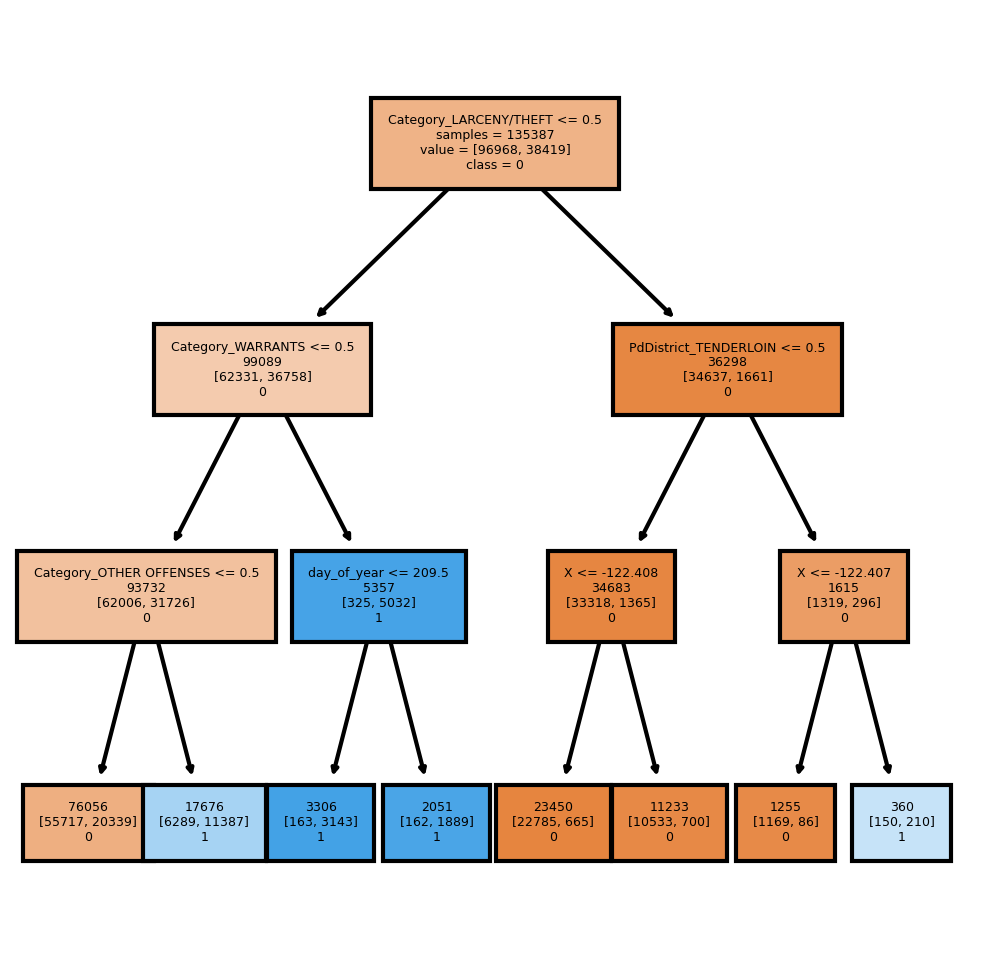

In [55]:
#--------------
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plot = plt.subplots(figsize = (4,4), dpi=300)[0]
plot = plot_tree(model,
                fontsize=3,
                feature_names = features, 
                class_names = ['0','1'], # class_names in ascending numerical order 
                label="root",
                impurity=False,
                filled=True) 
plt.show()

# All of the blue colored boxes correspond to prediction that a crime would be resolved
# Take a look at the tree to see what it thinks are important for predicting an outcome

# Improving performance through architecture
We will try and improve our model's performance by changing its architecture. Let's focus on the maximum_depth parameter.

Our previous tree was relatively simple and shallow with a maximum_depth = 3. Let's see what happens if we increase it to 100

In [56]:
# fit a very deep tree
model = sklearn.tree.DecisionTreeClassifier(random_state=1, max_depth=100)

train_accuracy, test_accuracy = fit_and_test_model(model)
print("Train accuracy", train_accuracy)
print("Test accuracy", test_accuracy)

Train accuracy 0.9995864881946777
Test accuracy 0.7767968524220694


In [ ]:
# The training, however, has increased much more. While we're happy with 
#the improvement in test accuracy, this is a clear sign of overfitting.

#Overfitting with decision trees becomes even more obvious when we have more 
#typical (smaller) sized datasets. Let's re-run the previous exercise but with only 100 training samples

In [57]:
# Temporarily shrink the training set to something
# more realistic
full_training_set = train
train = train[:100]

# fit the same tree as before
model = sklearn.tree.DecisionTreeClassifier(random_state=1, max_depth=100)

# Assess on the same test set as before
train_accuracy, test_accuracy = fit_and_test_model(model)
print("Train accuracy", train_accuracy)
print("Test accuracy", test_accuracy)

# Roll the training set back to the full set
train = full_training_set

Train accuracy 1.0
Test accuracy 0.5850645895576951


# Pruning a tree

decision trees are notoriously prone to overfitting. In other words, 
they tend to fit very well to the data they're trained on, but generalize very 
poorly to unknown data. This gets worse the deeper the
tree gets or the smaller the training set gets. Let's see if we can mitigate this.

Pruning is the process of simplifying a decision tree so that it gives 
the best classification results while simultaneously reducing overfitting.
There are two types of pruning: pre-pruning and post-pruning.
    
    
Pre-pruning involves restricting the model during training, so that it does not grow larger than is useful. We will cover this below.

Post-pruning is when we simplify the tree after training it. It does not involve the making of any design decision ahead of time, but simply optimizing the exisiting model.

Prepruning
We can perform pre-pruning, by generating many models, each with different max_depth parameters. For each, we recording the balanced accuracy for the test set. To show that this is important even with quite large datasets, we will work with 10000 samples here.


In [59]:
# Temporarily shrink the training set to 10000
# for this exercise to see how pruning is important
# even with moderately large datasets
full_training_set = train
train = train[:10000]


# Loop through the values below and build a model
# each time, setting the maximum depth to that value 
max_depth_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,15, 20, 50, 100]
accuracy_trainset = []
accuracy_testset = []
for depth in max_depth_range:
    # Create and fit the model
    prune_model = sklearn.tree.DecisionTreeClassifier(random_state=1, max_depth=depth)

    # Calculate and record its sensitivity
    train_accuracy, test_accuracy = fit_and_test_model(prune_model)
    accuracy_trainset.append(train_accuracy)
    accuracy_testset.append(test_accuracy)

# Plot the sensitivity as a function of depth  
pruned_plot = pandas.DataFrame(dict(max_depth=max_depth_range, accuracy=accuracy_trainset))

#fig = graphing.line_2D(dict(train=accuracy_trainset, test=accuracy_testset), x_range=max_depth_range, show=True)

# Roll the training set back to the full thing
#train = full_training_set


In [60]:
pruned_plot

,max_depth,accuracy
0,1,0.575199
1,2,0.687417
2,3,0.731848
3,4,0.731730
4,5,0.729716
5,6,0.742580
6,7,0.761021
7,8,0.776901
8,9,0.790832
9,10,0.801603


In [ ]:
# We can see from our plot that the best accuracy is obtained for a max_depth of about 10. We are looking to 
#simplify our tree, so we pick max_depth = 10 for our final pruned tree

In [61]:
# Temporarily shrink the training set to 10000
# for this exercise to see how pruning is important
# even with moderately large datasets
full_training_set = train
train = train[:10000]


# Not-pruned
model = sklearn.tree.DecisionTreeClassifier(random_state=1)
train_accuracy, test_accuracy = fit_and_test_model(model)
print("Unpruned Train accuracy", train_accuracy)
print("Unpruned Test accuracy", test_accuracy)


# re-fit our final tree to print out its performance
model = sklearn.tree.DecisionTreeClassifier(random_state=1, max_depth=10)
train_accuracy, test_accuracy = fit_and_test_model(model)
print("Train accuracy", train_accuracy)
print("Test accuracy", test_accuracy)

# Roll the training set back to the full thing
train = full_training_set

Unpruned Train accuracy 0.9996434937611408
Unpruned Test accuracy 0.7219189452075965
Train accuracy 0.8016027915999302
Test accuracy 0.7437900187051387


Our new and improved pruned model shows a marginally better balanced accuracy on the test set and much worse performance on the training set than the model that is not pruned. This means our pruning has significantly reduced overfitting.

If you woould like, change the sampples to 100, and notice how the optimal max_depth changes. 

Another option that you may like to play with is how many features are entered into the tree. Similar patterns of overfitting can be observed by manipulating this. In fact, the number and type of the features provided to a decision tree can be even more important than its sheer size

# Random forest?
A random forest is a collection of decision trees, which are used together to estimate which label a sample should be assigned. For example, if we were to train a random forest to predict medal winners, we might train 100 different decision trees. To make a prediction, we would use all trees independently. These would effectively ‘vote’ for whether the athlete would win a medal, providing a final decision


Random forests are built on the idea that while a single decision tree is highly biased, or overfit, if we train several decision trees, they'll be biased in different ways. This requires that each tree is trained independently, and each on a slightly different training set

In the previous exercise, we used decision trees to predict whether a crime would be solved in San Francisco.

Recall that decision trees did a reasonable job, but they have a tendency to overfit, meaning that the results would degrade considerably when using the test set or any unseen data.

This time we will used random forests to address that overfit tendency



In [63]:
import pandas

import numpy as np
from sklearn.model_selection import train_test_split

# Import the data from the .csv file
dataset = pandas.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/san_fran_crime.csv', delimiter="\t")

# Remember to one-hot encode our crime and PdDistrict variables 
categorical_features = ["Category", "PdDistrict"]
dataset = pandas.get_dummies(dataset, columns=categorical_features, drop_first=False)

# Split the dataset in an 90/10 train/test ratio. 
# Recall that our dataset is very large so we can afford to do this
# with only 10% entering the test set
train, test = train_test_split(dataset, test_size=0.1, random_state=2, shuffle=True)

# Let's have a look at the data and the relationship we are going to model
print(dataset.head())
print("train shape:", train.shape)
print("test shape:", test.shape)


   DayOfWeek  Resolution           X          Y  day_of_year  time_in_hours  \
0          5        True -122.403405  37.775421           29      11.000000   
1          5        True -122.403405  37.775421           29      11.000000   
2          1        True -122.388856  37.729981          116      14.983333   
3          2       False -122.412971  37.785788            5      23.833333   
4          5       False -122.419672  37.765050            1       0.500000   

   Category_ARSON  Category_ASSAULT  Category_BAD CHECKS  Category_BRIBERY  \
0               0                 0                    0                 0   
1               0                 0                    0                 0   
2               0                 0                    0                 0   
3               0                 0                    0                 0   
4               0                 0                    0                 0   

   ...  PdDistrict_BAYVIEW  PdDistrict_CENTRAL  PdDistri

In [64]:
# recall this from above
from sklearn.metrics import balanced_accuracy_score

# Make a utility method that we can re-use throughout this exercise
# To easily fit and test out model

features = [c for c in dataset.columns if c != "Resolution"]

def fit_and_test_model(model):
    '''
    Trains a model and tests it against both train and test sets
    '''  
    global features

    # Train the model
    model.fit(train[features], train.Resolution)

    # Assess its performance
    # -- Train
    predictions = model.predict(train[features])
    train_accuracy = balanced_accuracy_score(train.Resolution, predictions)

    # -- Test
    predictions = model.predict(test[features])
    test_accuracy = balanced_accuracy_score(test.Resolution, predictions)

    return train_accuracy, test_accuracy


print("Ready to go!")


# DECISION TREE

import sklearn.tree
# re-fit our last decision tree to print out its performance
model = sklearn.tree.DecisionTreeClassifier(random_state=1, max_depth=10) 

dt_train_accuracy, dt_test_accuracy = fit_and_test_model(model)

print("Decision Tree Performance:")
print("Train accuracy", dt_train_accuracy)
print("Test accuracy", dt_test_accuracy)

Ready to go!
Decision Tree Performance:
Train accuracy 0.7742407145595661
Test accuracy 0.7597105242913844


In [ ]:
# Random Forest
# A random forest is a collection of decision trees that work together to calculate the label for a sample.

# Trees in a random forest are trained independently, on different partitions of data, and thus develop different biases, but when combined they are less likely to overfit the data.

# Let's build a very simple forest with two trees and the default parameters

In [65]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest model with two trees
random_forest = RandomForestClassifier( n_estimators=2,
                                        random_state=2,
                                        verbose=False)

# Train and test the model
train_accuracy, test_accuracy = fit_and_test_model(random_forest)
print("Random Forest Performance:")
print("Train accuracy", train_accuracy)
print("Test accuracy", test_accuracy)

Random Forest Performance:
Train accuracy 0.8842998107846062
Test accuracy 0.734378540999183


In [ ]:
# ALTERING THE NUMBER OF TREES

import graphing

# n_estimators states how many trees to put in the model
# We will make one model for every entry in this list
# and see how well each model performs 
n_estimators = [2, 5, 10, 20, 50]

# Train our models and report their performance
train_accuracies = []
test_accuracies = []

for n_estimator in n_estimators:
    print("Preparing a model with", n_estimator, "trees...")

    # Prepare the model 
    rf = RandomForestClassifier(n_estimators=n_estimator, 
                                random_state=2, 
                                verbose=False)
    
    # Train and test the result
    train_accuracy, test_accuracy = fit_and_test_model(rf)

    # Save the results
    test_accuracies.append(test_accuracy)
    train_accuracies.append(train_accuracy)


# Plot results
graphing.line_2D(dict(Train=train_accuracies, Test=test_accuracies), 
                    n_estimators,
                    label_x="Numer of trees (n_estimators)",
                    label_y="Accuracy",
                    title="Performance X number of trees", show=True)

# Altering the minimum number of samples for split parameter

Recall that decision trees have a root node, internal nodes and leaf nodes, and that the first two can be split into newer nodes with subsets of data.

If we let our model split and create too many nodes, it can become increasingly complex and start to overfit.

One way to limit that complexity is to tell the model that each node needs to have at least a certain number of samples, otherwise it can't split into subnodes.

In other words, we can set the model's min_samples_split parameter to the least number of samples required so that a node can be split.

Our default value for min_samples_split is only 2, so models will quickly become too complex if that parameter is left untouched.

We will now use the best performing model above, then try it with different min_samples_split values and compare the results

In [67]:
# Shrink the training set temporarily to explore this
# setting with a more normal sample size
full_trainset = train
train = full_trainset[:1000] # limit to 1000 samples

min_samples_split = [2, 10, 20, 50, 100, 500]

# Train our models and report their performance
train_accuracies = []
test_accuracies = []

for min_samples in min_samples_split:
    print("Preparing a model with min_samples_split = ", min_samples)

    # Prepare the model 
    rf = RandomForestClassifier(n_estimators=20,
                                min_samples_split=min_samples,
                                random_state=2, 
                                verbose=False)
    
    # Train and test the result
    train_accuracy, test_accuracy = fit_and_test_model(rf)

    # Save the results
    test_accuracies.append(test_accuracy)
    train_accuracies.append(train_accuracy)


# Plot results ( think oif how to plot this graoh as graphing function doesnt work here)
#graphing.line_2D(dict(Train=train_accuracies, Test=test_accuracies), 
                   # min_samples_split,
                    #label_x="Minimum samples split (min_samples_split)",
                    #label_y="Accuracy",
                    #title="Performance", show=True)

# Rol back the trainset to the full set
train = full_trainset


# Note@ 
# As you can see above, small restrictions on the model's complexity - by limiting its ability to split nodes - reduce the gap between training and test performance. If this is subtle, it does so without damaging test performance at all.

#By limiting the model complexity we address overfitting, improving its ability to generalize and make accurate predictions on unseen data.

#Notice that using min_samples_split=20 gave us the best result for the test set, and that higher values worsened outcomes

Preparing a model with min_samples_split =  2
Preparing a model with min_samples_split =  10
Preparing a model with min_samples_split =  20
Preparing a model with min_samples_split =  50
Preparing a model with min_samples_split =  100
Preparing a model with min_samples_split =  500


# Altering the model depth
A related method to limit the trees is restricting max_depth. This is equivalent to max_depth we used for our decision tree, earlier. Its default value is None, which means nodes can be expanded until all leaves are pure (all samples in it have the same label) or have less samples than the value set for min_samples_split.

Whether max_depth, or min_samples_split is more appropriate depends on the nature of your dataset, including its size. Usually we need to experiment to find the best settings. Let's investigate max_depth as though we only had 500 crime samples available for our training set

In [68]:
# Shrink the training set temporarily to explore this
# setting with a more normal sample size
full_trainset = train
train = full_trainset[:500] # limit to 500 samples

max_depths = [2, 4, 6, 8, 10, 15, 20, 50, 100]

# Train our models and report their performance
train_accuracies = []
test_accuracies = []

for max_depth in max_depths:
    print("Preparing a model with max_depth = ", max_depth)

    # Prepare the model 
    rf = RandomForestClassifier(n_estimators=20,
                                max_depth=max_depth,
                                random_state=2, 
                                verbose=False)
    
    # Train and test the result
    train_accuracy, test_accuracy = fit_and_test_model(rf)

    # Save the results
    test_accuracies.append(test_accuracy)
    train_accuracies.append(train_accuracy)


# Plot results
#graphing.line_2D(dict(Train=train_accuracies, Test=test_accuracies),
                    #max_depths,
                    #label_x="Maximum depth (max_depths)",
                    #label_y="Accuracy",
                    #title="Performance", show=True)

# Rol back the trainset to the full set
train = full_trainset

Preparing a model with max_depth =  2
Preparing a model with max_depth =  4
Preparing a model with max_depth =  6
Preparing a model with max_depth =  8
Preparing a model with max_depth =  10
Preparing a model with max_depth =  15
Preparing a model with max_depth =  20
Preparing a model with max_depth =  50
Preparing a model with max_depth =  100


The plot above tells us that our model actually benefits from a higher value for max_depth, up to the limit of 15.

Increasing depth beyond this point begins to harm test performence, as it constrains the model too much for it to generalize.

As usual, it is important to evaluate different values when setting model parameters and defining its architecture


# Optimized model

In [69]:
# Prepare the model 
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=128,
                            max_features=25,
                            min_samples_split=2,
                            random_state=2, 
                            verbose=False)

# Train and test the result
print("Training model. This may take 1 - 2 minutes")
train_accuracy, test_accuracy = fit_and_test_model(rf)

# Print out results, compared to the decision tree
data = {"Model": ["Decision tree","Final random forest"],
        "Train sensitivity": [dt_train_accuracy, train_accuracy],
        "Test sensitivity": [dt_test_accuracy, test_accuracy]
        }

pandas.DataFrame(data, columns = ["Model", "Train sensitivity", "Test sensitivity"])



Training model. This may take 1 - 2 minutes


,Model,Train sensitivity,Test sensitivity
0,Decision tree,0.774241,0.759711
1,Final random forest,1.000000,0.719738


# Hyperparameter tuning with random forests


#The goal of this unit is to explore how hyperparameters change training, and thus model performance. The line between model architecture and hyperparameters is a bit blurry for random forests because training itself actually changes the architecture of the model by adding or removing branches.

We will again persue our goal of predicting which crimes in San Francisco will be resolved

In [71]:


features = [c for c in dataset.columns if c != "Resolution"]

# Make a utility method that we can re-use throughout this exercise
# To easily fit and test out model
def fit_and_test_model(model):
    '''
    Trains a model and tests it against both train and test sets
    '''  
    global features

    # Train the model
    model.fit(train[features], train.Resolution)

    # Assess its performance
    # -- Train
    predictions = model.predict(train[features])
    train_accuracy = balanced_accuracy_score(train.Resolution, predictions)

    # -- Test
    predictions = model.predict(test[features])
    test_accuracy = balanced_accuracy_score(test.Resolution, predictions)

    return train_accuracy, test_accuracy


print("Ready!")

Ready!


In [72]:
# Split the dataset in an 90/10 train/test ratio. 
train, test = train_test_split(dataset, test_size=0.1, random_state=2, shuffle=True)

# Criteria to split on
The first hyperparameter we will work with is the criterion. This is essentially a kind of cost function that is used to determine whether a node should be split or not. We have two options available in the package that we are using: gini and entropy. Let's try them both

In [73]:
from sklearn.ensemble import RandomForestClassifier

# Shrink the training set temporarily to explore this
# setting with a more normal sample size
sample_size = 1000
full_trainset = train
train = full_trainset[:sample_size]


# Prepare the model 
rf = RandomForestClassifier(n_estimators=10,
                            # max_depth=12,
                            # max_features=cur_max_features,
                            random_state=2,
                            criterion="gini", 
                            verbose=False)
# Train and test the result
train_accuracy, test_accuracy = fit_and_test_model(rf)
# Train and test the result
print(train_accuracy, test_accuracy)

# Prepare the model 
rf = RandomForestClassifier(n_estimators=10,
                            random_state=2,
                            criterion="entropy", 
                            verbose=False)
# Train and test the result
train_accuracy, test_accuracy = fit_and_test_model(rf)
# Train and test the result
print(train_accuracy, test_accuracy)

# Roll back the train dataset to the full train set
train = full_trainset

0.9719390319921176 0.6842617724903477
0.9701142144738695 0.6912451859737102


# Minimum impurity decrease
The minimum impurity decrease is another criterion that is used to assess whether a node should be split. It is used by the gini or entropy algorithms we used, above. If minimu impurity decrease is high, then splitting a node must result in substantial performance improvement. If it is very low, then nodes can be split even if they offer very little to no performance improvements on the training dataset

In [76]:
import numpy as np

# Shrink the training set temporarily to explore this
# setting with a more normal sample size
full_trainset = train
train = full_trainset[:1000] # limit to 1000 samples

min_impurity_decreases = np.linspace(0, 0.0005, num=100)

# Train our models and report their performance
train_accuracies = []
test_accuracies = []

print("Working...")
for min_impurity_decrease in min_impurity_decreases:

    # Prepare the model 
    rf = RandomForestClassifier(n_estimators=10,
                                min_impurity_decrease=min_impurity_decrease,
                                random_state=2, 
                                verbose=False)
    
    # Train and test the result
    train_accuracy, test_accuracy = fit_and_test_model(rf)

    # Save the results
    test_accuracies.append(test_accuracy)
    train_accuracies.append(train_accuracy)


# Plot results( this graph dosnt work as graphiong module is not found here)
#graphing.line_2D(dict(Train=train_accuracies, Test=test_accuracies), 
                    #min_impurity_decreases,
                    #label_x="Minimum impurity decreases (min_impurity_decrease)",
                    #label_y="Accuracy",
                    #title="Performance", show=True)

# Roll back the train dataset to the full train set
train = full_trainset

Working...


# Maximum number of features
When trees are created, they are provided with a subset of the data. This not only means they see a certain collection of rows (samples), but also a certain collection of columns (features). The more features are provided, the more likely a given tree is going to overfit. Let's see what happens when we restrict the maximum number of features that can be provided to each tree in the forest

In [78]:
# Shrink the training set temporarily to explore this
# setting with a more normal sample size
full_trainset = train
train = full_trainset[:1000] # limit to 1000 samples

max_features = range(10, len(features) +1)

# Train our models and report their performance
train_accuracies = []
test_accuracies = []

print("Working...")
for cur_max_features in max_features:
    # Prepare the model 
    rf = RandomForestClassifier(n_estimators=50,
                                max_depth=12,
                                max_features=cur_max_features,
                                random_state=2, 
                                verbose=False)
    
    # Train and test the result
    train_accuracy, test_accuracy = fit_and_test_model(rf)

    # Save the results
    test_accuracies.append(test_accuracy)
    train_accuracies.append(train_accuracy)


# Plot results
#graphing.line_2D(dict(Train=train_accuracies, Test=test_accuracies), 
                    #max_features,
                    #label_x="Maximum number of features (max_features)",
                    #label_y="Accuracy",
                    #title="Performance", show=True)

# Roll back the trainset to the full set
train = full_trainset

Working...


# Seeding
Finally, we come to seeding. When trees are initially made, there is a degree of randomness that is used to decide which features and samples will be provided to which trees. Changing the random state (seed) value changes this initial state.

The random seed is not a parameter to be tuned, but its effects on our models shouldn't be forgotten, particularly when there isn't much data to work with. Let's see how our model behaves with different random states

In [80]:
# Shrink the training set temporarily to explore this
# setting with a more normal sample size
sample_size = 1000
full_trainset = train
train = full_trainset[:sample_size] 


seeds = range(0,101)

# Train our models and report their performance
train_accuracies = []
test_accuracies = []

for seed in seeds:
    # Prepare the model 
    rf = RandomForestClassifier(n_estimators=10,
                                random_state=seed, 
                                verbose=False)
    
    # Train and test the result
    train_accuracy, test_accuracy = fit_and_test_model(rf)

    # Save the results
    test_accuracies.append(test_accuracy)
    train_accuracies.append(train_accuracy)


# Plot results
#graphing.line_2D(dict(Train=train_accuracies, Test=test_accuracies), 
                    #seeds,
                    #label_x="Minimum impurity decreases (min_impurity_decrease)",
                    #label_y="Accuracy",
                    #title="Performance", show=True)

# Roll back the trainset to the full set
train = full_trainset

# There's no correlation between high or low seed values and performance: seed is not something to 'tune'.

In [17]:

from sklearn.model_selection import train_test_split

# Create feature and target arrays
y = df['avalanche'].values
X = df.drop('avalanche', axis=1).values
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y) 


In [18]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
SEED = 1
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[1 0 0 1 1]


# Evaluate the classifier Tree

In [19]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.73


# Logistic regression vs classification tree
A classification tree divides the feature space into rectangular regions. 

In contrast, a linear model such as logistic regression produces only a single linear 
decision boundary dividing the feature space into two decision regions


# AZURE: # Machine Learning with Tree-Based Models 

In [34]:


#Import the data from the .csv file
import pandas as pd
dataset = pandas.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/san_fran_crime.csv', delimiter="\t")

dataset

,Category,DayOfWeek,PdDistrict,Resolution,X,Y,day_of_year,time_in_hours
0,WEAPON LAWS,5,SOUTHERN,True,-122.403405,37.775421,29,11.000000
1,WEAPON LAWS,5,SOUTHERN,True,-122.403405,37.775421,29,11.000000
2,WARRANTS,1,BAYVIEW,True,-122.388856,37.729981,116,14.983333
3,NON-CRIMINAL,2,TENDERLOIN,False,-122.412971,37.785788,5,23.833333
4,NON-CRIMINAL,5,MISSION,False,-122.419672,37.765050,1,0.500000
...,...,...,...,...,...,...,...,...
150426,ASSAULT,5,PARK,False,-122.453982,37.771428,365,21.016667
150427,NON-CRIMINAL,5,CENTRAL,False,-122.401857,37.796626,365,8.000000
150428,LARCENY/THEFT,4,CENTRAL,False,-122.412269,37.790673,364,20.000000
150429,LARCENY/THEFT,5,CENTRAL,False,-122.406659,37.788275,365,10.000000


In [27]:
# Azure contiuues here
from sklearn.model_selection import train_test_split

# Split the dataset in an 90/10 train/test ratio. 
# We can afford to do this here because our dataset is very very large
# Normally we would choose a more even ratio
train, test = train_test_split(df1, test_size=0.1, random_state=2, shuffle=True)

print("Data shape:")
print("train", train.shape)
print("test", test.shape)

Data shape:
train (985, 11)
test (110, 11)


In [28]:
df

,Unnamed: 0,avalanche,no_visitors,surface_hoar,fresh_thickness,wind,weak_layers,tracked_out
0,0,0,4,3.900508,8.715485,6,9,0
1,1,0,9,1.477586,6.801417,30,0,0
2,2,1,3,3.236594,5.632457,8,8,1
3,3,0,0,3.244283,9.348871,12,10,0
4,4,1,2,5.196741,3.782315,4,9,1
...,...,...,...,...,...,...,...,...
1090,1090,1,1,2.182905,6.109184,3,9,0
1091,1091,0,2,3.718231,10.426100,28,0,0
1092,1092,1,8,7.037647,9.741006,34,3,0
1093,1093,0,2,2.449889,7.337579,37,10,1


# Model assessment code

In [ ]:
from sklearn.metrics import balanced_accuracy_score

# Make a utility method that we can re-use throughout this exercise
# To easily fit and test out model

features = [c for c in dataset.columns if c != "Resolution"]


def fit_and_test_model(model):
    '''
    Trains a model and tests it against both train and test sets
    '''  
    global features

    # Train the model
    model.fit(train[features], train.Resolution)

    # Assess its performance
    # -- Train
    predictions = model.predict(train[features])
    train_accuracy = balanced_accuracy_score(train.Resolution, predictions)

    # -- Test
    predictions = model.predict(test[features])
    test_accuracy = balanced_accuracy_score(test.Resolution, predictions)

    return train_accuracy, test_accuracy


print("Ready to go!")